In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd drive/MyDrive/Efficient-CapsNet-main

/content/drive/MyDrive/Efficient-CapsNet-main


In [5]:
pwd

'/content/drive/MyDrive/Efficient-CapsNet-main'

In [6]:
pip install -r requirements.txt

     |████████████████████████████████| 686kB 8.2MB/s 


# Efficient-CapsNet Model Train

In this notebook we provide a simple interface to train Efficient-CapsNet on the three dataset discussed in "Efficient-CapsNet: Capsule Network with Self-Attention Routing":

- MNIST (MNIST)
- smallNORB (SMALLNORB)
- Multi-MNIST (MULTIMNIST)

The hyperparameters have been only slightly investigated. So, there's a lot of room for improvements. Good luck!

**NB**: remember to modify the "config.json" file with the appropriate parameters.

%load_ext autoreload
%autoreload 2

In [5]:
import tensorflow as tf
from utils import Dataset, plotImages, plotWrongImages, plotHistory
from models import EfficientCapsNet

In [6]:
gpus = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)

In [7]:
# some parameters
#model_name = 'MNIST'
model_name = 'TERM_PROJECT'

# 1.0 Import the Dataset

In [8]:
dataset = Dataset(model_name, config_path='config.json')
#(60000, 28, 28, 1) (60000, 10) (10000, 28, 28, 1) (10000, 10) <class 'tuple'>
#(2450, 28, 28, 1) (2450, 10) (1700, 28, 28, 1) (1700, 10) <class 'tuple'>

(2450, 28, 28, 1) (2450, 10) (1700, 28, 28, 1) (1700, 10) <class 'tuple'>
[INFO] Dataset loaded!


## 1.1 Visualize imported dataset

(20, 28, 28) (20, 10) 20 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


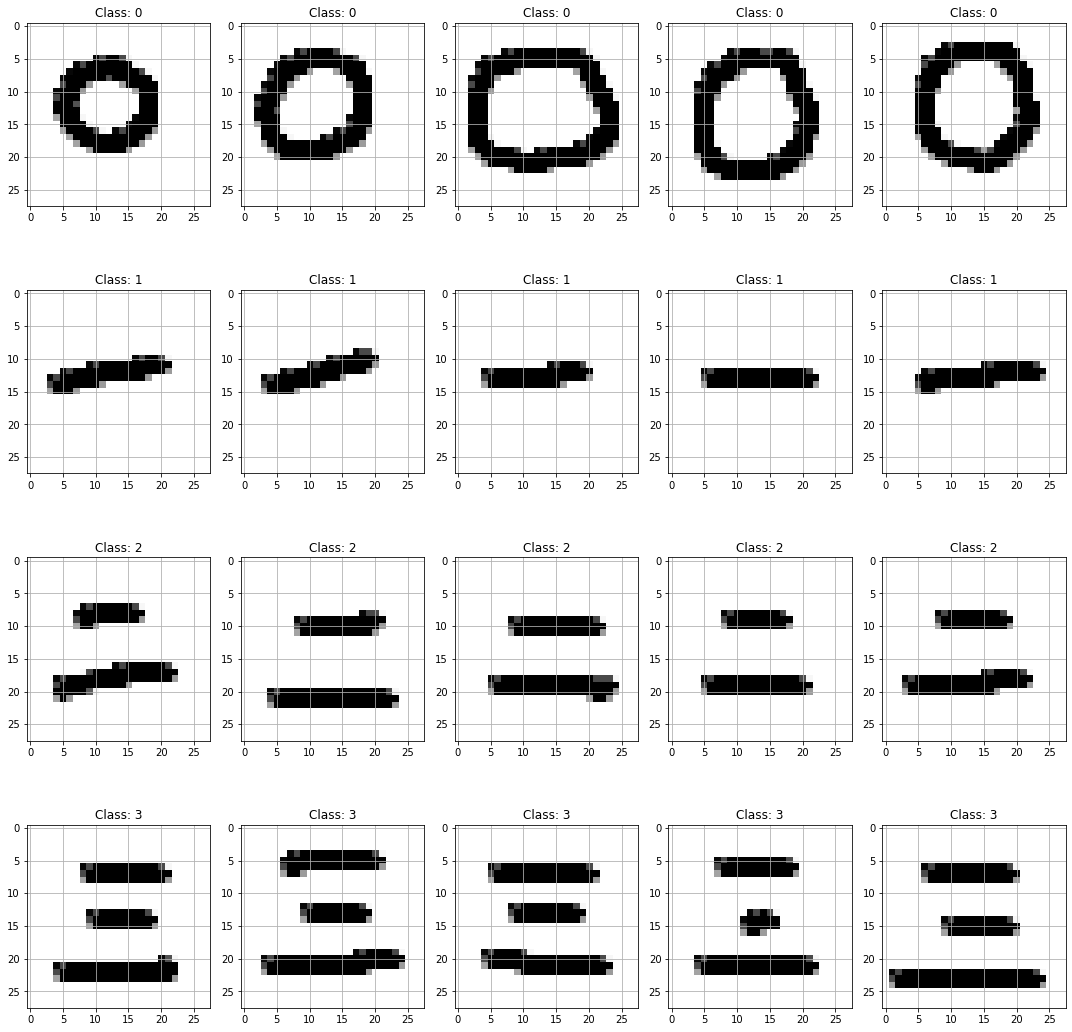

In [9]:
n_images = 20 # number of images to be plotted
plotImages(dataset.X_test[:n_images,...,0], dataset.y_test[:n_images], n_images, dataset.class_names)
#(20, 28, 28) (20, 10) 20 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
#(20, 28, 28) (20, 10) 20 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# 2.0 Load the Model

In [10]:
model_train = EfficientCapsNet(model_name, mode='train', verbose=True)

Model: "Efficient_CapsNet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
batch_normalization (BatchNo (None, 24, 24, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 22, 22, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 64)        36928     
_________________________________________________________________
batch_normalization_2 (Batch (None, 20, 20, 64)  

# 3.0 Train the Model

In [11]:
dataset_train, dataset_val = dataset.get_tf_data() 

----> get_tf_data
----> get_tf_data TERM_PROJECT
Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.


In [12]:
history = model_train.train(dataset, initial_epoch=0)

----> get_tf_data
----> get_tf_data TERM_PROJECT
------------------------------TERM_PROJECT train------------------------------
Epoch 1/30
154/154 [==============================] - 24s 41ms/step - loss: 0.5074 - Efficient_CapsNet_loss: 0.4433 - Generator_loss: 0.1635 - Efficient_CapsNet_accuracy: 0.6616 - val_loss: 0.3369 - val_Efficient_CapsNet_loss: 0.2704 - val_Generator_loss: 0.1698 - val_Efficient_CapsNet_accuracy: 0.6965

Epoch 00001: val_Efficient_CapsNet_accuracy improved from -inf to 0.69647, saving model to bin/efficient_capsnetTERM_PROJECT_new_train.h5
Epoch 2/30
154/154 [==============================] - 3s 18ms/step - loss: 0.1777 - Efficient_CapsNet_loss: 0.1263 - Generator_loss: 0.1312 - Efficient_CapsNet_accuracy: 0.9306 - val_loss: 0.1690 - val_Efficient_CapsNet_loss: 0.1047 - val_Generator_loss: 0.1642 - val_Efficient_CapsNet_accuracy: 0.9100

Epoch 00002: val_Efficient_CapsNet_accuracy improved from 0.69647 to 0.91000, saving model to bin/efficient_capsnetTERM_PROJE

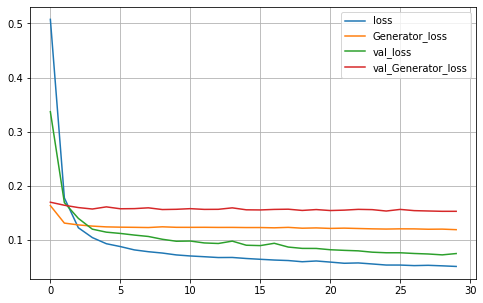

In [13]:
plotHistory(history)